<h1 style='font-size: 50px; text-align: center; font-family: 'Formata', serif;'>
    Analysis of Complex Data, Master in Data Science & Engineering, 2023-2024
</h1>

<h1 style='font-size: 30px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        1. Import libraries, classes, custom functions, and data load</h1>

In [2]:
import pandas as pd
import utility_func as utils
import DataLoaderLocal
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Adjust display options to show all columns
pd.set_option('display.max_columns', None)

In [6]:
############## Or go to Section 3 (DP - Data Preparation) to load a CSV file specifically created for the Recommendation System ##############
business, reviews, users = DataLoaderLocal.LoadJSON()

utils.YelpDatasets(business_df = business, reviews_df = reviews, users_df = users)

Business DataFrame's head:


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."



Reviews DataFrame's head:


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15



Users DataFrame's head:


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,3.91,250,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,3.74,1145,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,3.32,89,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,4.27,24,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,3.54,1,1,0,0,0,1,1,0,0,0,0


<h1 style='font-size: 30px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        2. EDA - Exploratory Data Analysis</h1>

In [9]:
# Aggregation of data, with relevant columns, from the business and reviews datasets
cities = business[['business_id', 'city', 'review_count', 'is_open']]
reviews_small = reviews[['review_id', 'business_id', 'stars']]

cities_reviews = pd.merge(reviews_small, cities, left_on='business_id', right_on='business_id', how='left')
cities_reviews = cities_reviews[cities_reviews['is_open'] == 1].reset_index().drop(columns=['index'])
cities_reviews

,review_id,business_id,stars,city,review_count,is_open
0,KU_O5udG6zpxOg-VcAEodg,XQfwVwDr-v0ZS3_CbbE5Xw,3,North Wales,169,1
1,saUsX_uimxRlCVr67Z4Jig,YjUWPpI6HXG530lwP-fb2A,3,Tucson,47,1
2,AqPFMleE6RsU23_auESxiA,kxX2SOes4o-D3ZQBkiMRfA,5,Philadelphia,181,1
3,6AxgBCNX_PNTOxmbRSwcKQ,gmjsEdUsKpj9Xxu6pdjH0g,5,New Orleans,359,1
4,ZKvDG2sBvHVdF5oBNUOpAQ,B5XSoSG3SfvQGtKEGQ1tSQ,3,Santa Barbara,13,1
...,...,...,...,...,...,...
5791229,H0RIamZu0B0Ei0P4aeh3sQ,jals67o91gcrD4DC81Vk6w,5,Boise,36,1
5791230,shTPgbgdwTHSuU67mGCmZQ,2vLksaMmSEcGbjI5gywpZA,5,Wimauma,30,1
5791231,YNfNhgZlaaCO5Q_YJR4rEw,R1khUUxidqfaJmcpmGd4aw,4,Willow Grove,32,1
5791232,i-I4ZOhoX70Nw5H0FwrQUA,Rr9kKArrMhSLVE9a53q-aA,5,Indianapolis,83,1


In [10]:
n_cities = cities_reviews['city'].nunique()
print(f'Number of cities that have at least one restaurant open: {n_cities} (total is 1416 cities).')

Number of cities that have at least one restaurant open: 1320 (total is 1416 cities).


<h1 style='font-size: 25px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        2.1 Analysing cities with more reviews and with high variance of stars in the reviews</h1>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>The idea with this analysis is to find the cities that have a higher variation on the reviews made by users on that location. Notice that both the business and reviews datasets have a column named 'stars', however the column chosen was from the reviews dataset because the other is simply the stars of the restaurant, not the stars given by users (interactions of our RS).</p>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>So, the code below computes the variance and the number of reviews for all 1320 cities that have at least one restaurant open, and sorts the resulting dataframe by the variance of the review's stars in a descending order. After that, only cities with more than 300.000 reviews are considered, and then the final selection results in the remaining 5 cities with the highest variance.</p>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>I decided to apply a describe() to the stars of the reviews of each city, to better understand the distribution of reviews. Looking at the quartiles, the one that stood out was Tucson because at least 25% of the reviews have 2 stars or less, which shows more lower reviews than all other cities, with a first quartile of 3 stars.</p>

<p style='margin-bottom: 12px; font-size: 16px; font-family: 'Formata', serif;'>Therefore, given the importance of having a lot of reviews and a variety of review stars, it appears to me that Tucson is a very good candidate for the city to be chosen.</p>

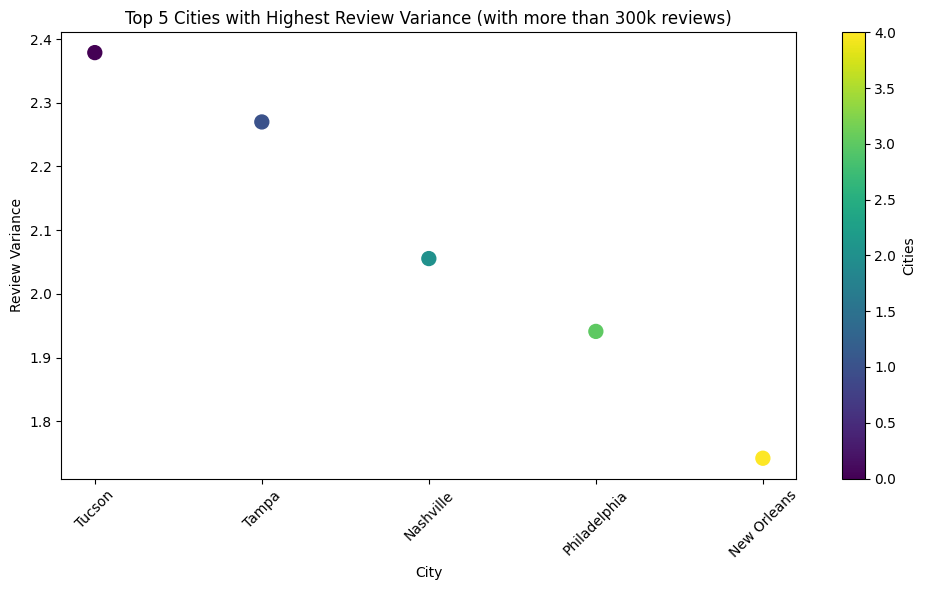

In [11]:
top5_variance_cities = utils.Top5VarianceCities(merged_df = cities_reviews)
top5_variance_cities

plt.figure(figsize=(10, 6))
colors = np.arange(len(top5_variance_cities))
plt.scatter(top5_variance_cities['city'], top5_variance_cities['star_var'], c=colors, cmap='viridis', s=100)
plt.xlabel('City')
plt.ylabel('Review Variance')
plt.title('Top 5 Cities with Highest Review Variance (with more than 300k reviews)')
plt.xticks(rotation=45)
colorbar = plt.colorbar()
colorbar.set_label('Cities')
plt.tight_layout()
plt.show()

In [12]:
top5_cities = list(top5_variance_cities['city'])

city_describe = utils.DescribeCities(merged_df = cities_reviews, cities = top5_cities)
city_describe

,Tucson,Tampa,Nashville,Philadelphia,New Orleans
count,341468.000000,380129.000000,377389.000000,744111.000000,536736.000000
mean,3.720899,3.773532,3.846999,3.827116,3.971172
std,1.542284,1.506598,1.433681,1.393248,1.319891
min,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,3.000000,3.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000


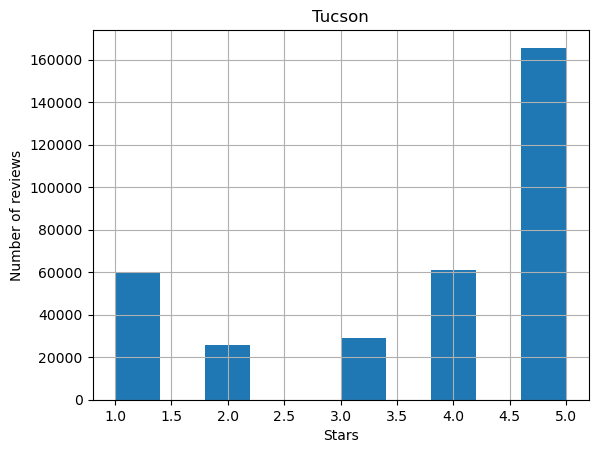

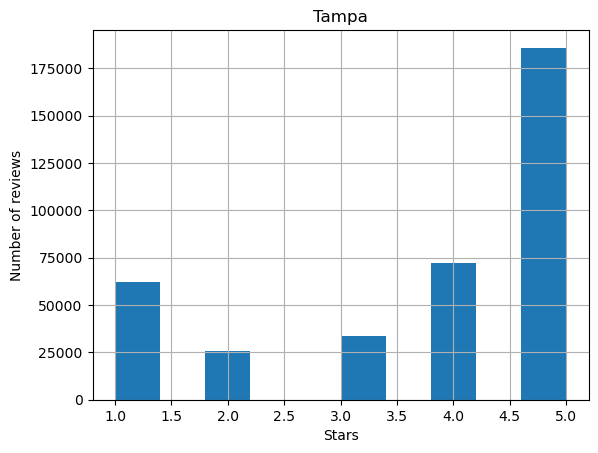

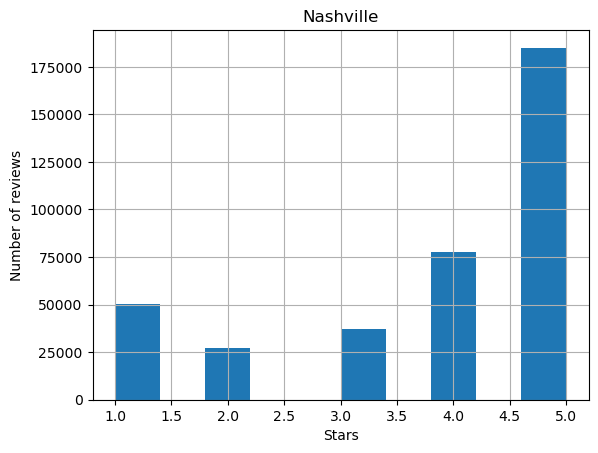

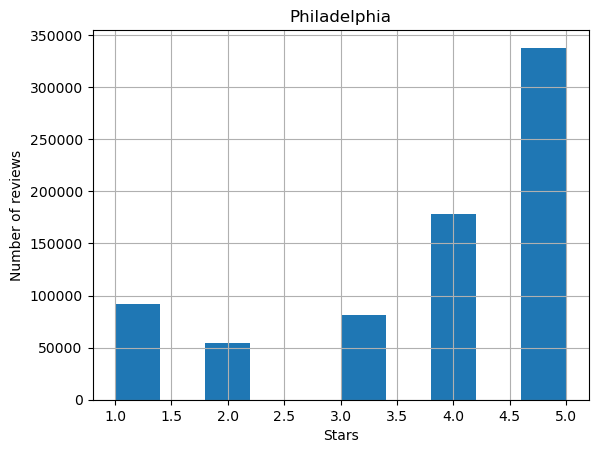

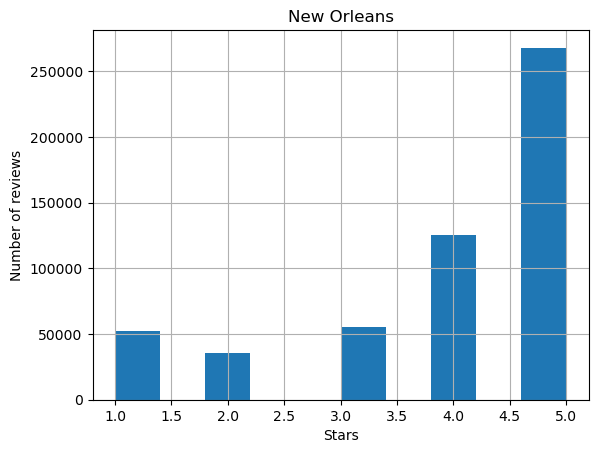

In [7]:
utils.HistogramEDA2_2(merged_df = cities_reviews, city = top5_cities[0])
utils.HistogramEDA2_2(merged_df = cities_reviews, city = top5_cities[1])
utils.HistogramEDA2_2(merged_df = cities_reviews, city = top5_cities[2])
utils.HistogramEDA2_2(merged_df = cities_reviews, city = top5_cities[3])
utils.HistogramEDA2_2(merged_df = cities_reviews, city = top5_cities[4])

<h1 style='font-size: 25px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        2.2 Tucson</h1>


In [9]:
# 1. Filtering data for the city of Tucson and "open" in the "business" table only:
df_business_tucson = business[(business['city'] == 'Tucson') & (business['is_open'] == 1)]

# Filtering reviews related to businesses in Tucson:
df_reviews_tucson = reviews[reviews['business_id'].isin(df_business_tucson['business_id'])]

c:\Users\pport\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pport\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pport\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


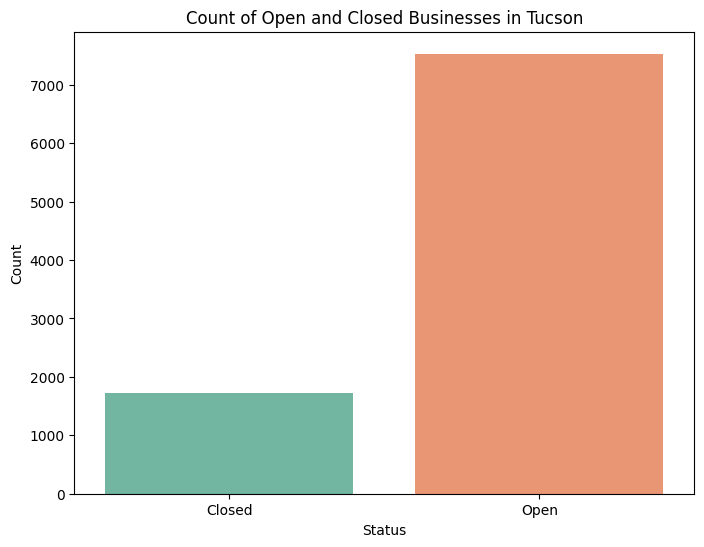

In [10]:
# 2. Count of Open and Closed Businesses in Tucson:
df_business_tucson = business[business['city'] == 'Tucson']

# Count the number of open and closed businesses in Tucson
business_open_closed = df_business_tucson['is_open'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=business_open_closed.index, y=business_open_closed.values, palette='Set2')
plt.xticks([0, 1], ['Closed', 'Open'])
plt.title('Count of Open and Closed Businesses in Tucson')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

c:\Users\pport\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pport\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\pport\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


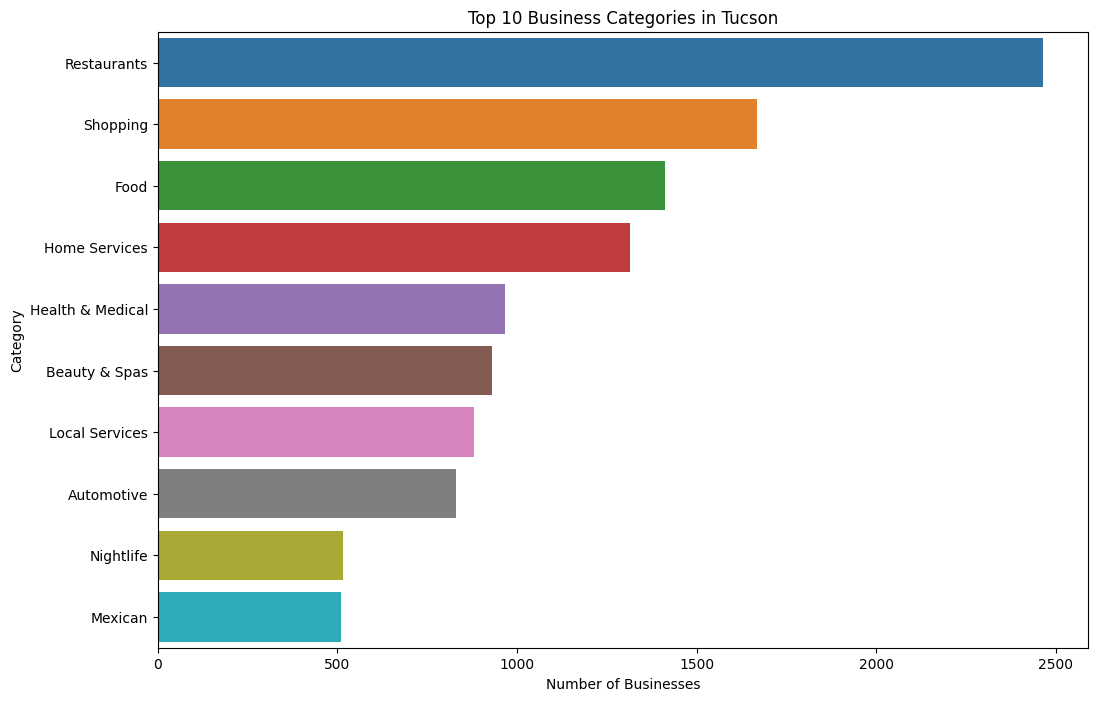

In [14]:
# 3. Bar Plot of Top 10 Most Common Categories in Tucson:
plt.figure(figsize=(12, 8))
top_categories = df_business_tucson['categories'].str.split(',').explode().str.strip().value_counts()[:10]
sns.barplot(y=top_categories.index, x=top_categories.values)
plt.title('Top 10 Business Categories in Tucson')
plt.xlabel('Number of Businesses')
plt.ylabel('Category')
plt.show()

C:\Users\pport\AppData\Local\Temp\ipykernel_28456\3863980666.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_tucson['yelping_since'] = pd.to_datetime(df_users_tucson['yelping_since'])
C:\Users\pport\AppData\Local\Temp\ipykernel_28456\3863980666.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_users_tucson['yelping_since_year'] = df_users_tucson['yelping_since'].dt.year
c:\Users\pport\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_cate

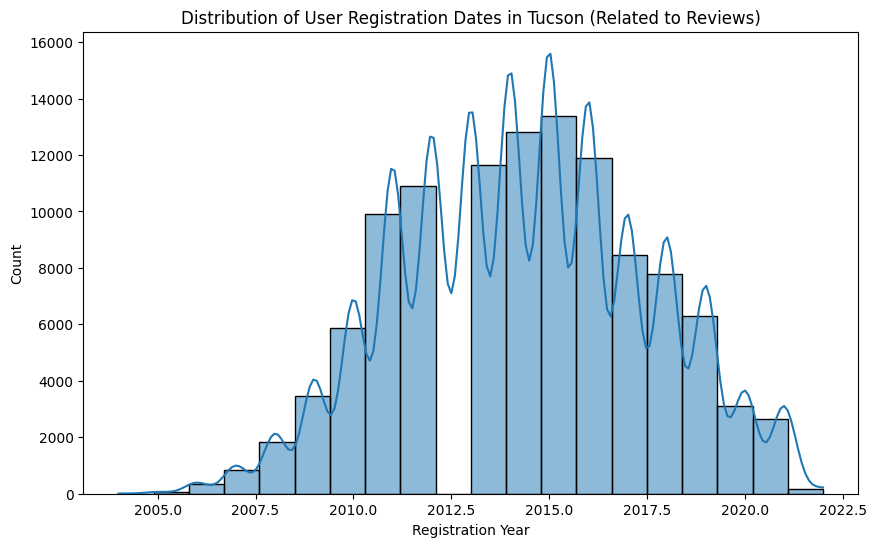

In [15]:
# 4. Analysis of User Registration Dates related to reviews in Tucson:
df_users_tucson = users[users['user_id'].isin(df_reviews_tucson['user_id'])]
df_users_tucson['yelping_since'] = pd.to_datetime(df_users_tucson['yelping_since'])
df_users_tucson['yelping_since_year'] = df_users_tucson['yelping_since'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(data=df_users_tucson, x='yelping_since_year', bins=20, kde=True)
plt.title('Distribution of User Registration Dates in Tucson (Related to Reviews)')
plt.xlabel('Registration Year')
plt.ylabel('Count')
plt.show()

In [16]:
# 5. Correlation between Features (only for numeric variables) in the "business" table:
correlation_matrix_business = df_business_tucson.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_business, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Business Features in Tucson')
plt.show()

ValueError: could not convert string to float: 'tUFrWirKiKi_TAnsVWINQQ'

<h1 style='font-size: 30px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        3. DP - Data Preparation</h1>

In [8]:
city = 'Tucson'
rs_dataset = utils.PrepareDataFrameRS(business_df = business, 
                                      reviews_df = reviews, 
                                      users_df = users, 
                                      city = city)

rs_dataset

,user_id,business_id,stars
0,0,0,3
1,1,0,2
2,2,0,5
3,3,0,5
4,4,0,3
...,...,...,...
341463,80431,7532,5
341464,36379,7532,4
341465,81267,7532,1
341466,43362,7532,5


In [9]:
# we will use the pivot function
matrix = rs_dataset.pivot(index = 'user_id', columns = 'business_id', values = 'stars')
print(f"Dataset's sparsity: {matrix.notnull().sum().sum() / (matrix.shape[0] * matrix.shape[1]):.2%}")

Dataset's sparsity: 0.04%


In [10]:
# CSV file ready for Recommendation System building
rs_dataset = pd.read_csv('yelp_dataset/rs_dataset.csv')

In [2]:
#Use the CSV file from Google drive
url='https://drive.google.com/file/d/1YkU4wycHX-917CjGddrN-mRpX8LvTN-I/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
new_rs_dataset = pd.read_csv(url)
new_rs_dataset.head(10)

,user_id,business_id,stars
0,0,0,3
1,1,0,2
2,2,0,5
3,3,0,5
4,4,0,3
5,5,0,4
6,6,0,4
7,7,0,5
8,8,0,4
9,9,0,5


In [3]:
trainset, testset = utils.PrepareDataSurprise(df = new_rs_dataset)
##### Start with a lower sample size value, for example 50k, otherwise your computer will die #####
ubcf_trainset, ubcf_testset = utils.PrepareDataSurprise(df = new_rs_dataset, sample_size=25000)

In [4]:
# Get the number of users and items in the trainset
num_users = trainset.n_users
num_items = trainset.n_items

# Get the number of ratings in the trainset
num_ratings = trainset.n_ratings

print(f"Number of users: {num_users}")
print(f"Number of items: {num_items}")
print(f"Number of ratings: {num_ratings}")

Number of users: 110727
Number of items: 7533
Number of ratings: 323174


<h1 style='font-size: 30px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        4. DM - Data Modeling</h1>

In [5]:
# User-Based Collaborative Filtering
ubcf_algo, ubcf_rmse, ubcf_predictions = utils.UserBasedCollaborativeFiltering(data_train = ubcf_trainset, 
                                                                               data_test = ubcf_testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5773


In [6]:
# Item-Based Collaborative Filtering
ibcf_algo, ibcf_rmse, ibcf_predictions = utils.ItemBasedCollaborativeFiltering(data_train = trainset, 
                                                                               data_test = testset)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 1.5549


In [7]:
# Singular Value Decomposition (Matrix Factorization)
svd_algo, svd_rmse, svd_predictions = utils.SingularValueDecomposition(data_train = trainset, 
                                                                       data_test = testset, 
                                                                       n_factors=20, 
                                                                       n_epochs=100, 
                                                                       lr=0.005)

RMSE: 1.3934


In [8]:
print(f"User-Based CF RMSE: {ubcf_rmse:.3f}")
print(f"Item-Based CF RMSE: {ibcf_rmse:.3f}")
print(f"SVD RMSE: {svd_rmse:.3f}")

User-Based CF RMSE: 1.577
Item-Based CF RMSE: 1.555
SVD RMSE: 1.393


<h1 style='font-size: 30px; font-weight: bold; margin-bottom: 10px; font-family: 'Formata', serif;'>
        5. Model Evaluation</h1>

In [9]:
pred, best_pred, worst_pred = utils.PredictionsRS(trainset = trainset, 
                                                  predictions = svd_predictions, 
                                                  n = 20)

In [21]:
pred

,uid,iid,r_ui,est,details,user_n_rated,item_n_rated,err
0,4386,1590,4.0,4.212419,{'was_impossible': False},89,89,0.212419
1,52976,3616,1.0,4.058567,{'was_impossible': False},5,17,3.058567
2,23443,4054,5.0,5.000000,{'was_impossible': False},16,97,0.000000
3,20153,584,5.0,4.305576,{'was_impossible': False},7,12,0.694424
4,1297,5334,4.0,3.810374,{'was_impossible': False},70,40,0.189626
...,...,...,...,...,...,...,...,...
3260,17211,1340,2.0,2.194870,{'was_impossible': False},11,124,0.194870
3261,3476,2349,4.0,3.308889,{'was_impossible': False},26,103,0.691111
3262,32028,5194,5.0,3.141769,{'was_impossible': False},1,179,1.858231
3263,7303,4642,5.0,2.779199,{'was_impossible': False},59,642,2.220801


In [22]:
best_pred

,uid,iid,r_ui,est,details,user_n_rated,item_n_rated,err
376,32125,3971,5.0,5.0,{'was_impossible': False},11,49,0.0
2861,2964,771,1.0,1.0,{'was_impossible': False},37,129,0.0
1997,61487,3341,5.0,5.0,{'was_impossible': False},2,4,0.0
131,1105,774,5.0,5.0,{'was_impossible': False},71,39,0.0
695,42273,4139,5.0,5.0,{'was_impossible': False},6,36,0.0
2855,29964,3609,5.0,5.0,{'was_impossible': False},3,164,0.0
620,21280,1538,5.0,5.0,{'was_impossible': False},21,258,0.0
364,72884,6889,5.0,5.0,{'was_impossible': False},5,368,0.0
136,1579,781,5.0,5.0,{'was_impossible': False},40,173,0.0
362,42334,3979,5.0,5.0,{'was_impossible': False},5,9,0.0


In [23]:
worst_pred

,uid,iid,r_ui,est,details,user_n_rated,item_n_rated,err
3095,49542,4601,5.0,1.207652,{'was_impossible': False},1,71,3.792348
80,34824,5510,1.0,4.812753,{'was_impossible': False},6,70,3.812753
1142,15758,1608,1.0,4.826904,{'was_impossible': False},33,128,3.826904
2177,2039,1598,1.0,4.834902,{'was_impossible': False},12,386,3.834902
1198,8819,123,1.0,4.984156,{'was_impossible': False},8,36,3.984156
1010,38182,6774,1.0,5.000000,{'was_impossible': False},3,268,4.000000
282,2573,746,1.0,5.000000,{'was_impossible': False},16,210,4.000000
1677,1694,4019,1.0,5.000000,{'was_impossible': False},285,441,4.000000
754,1270,1529,5.0,1.000000,{'was_impossible': False},17,524,4.000000
1932,38081,4878,5.0,1.000000,{'was_impossible': False},5,93,4.000000


In [ ]:
# Perform t-SNE dimensionality reduction and create visualization
projection = utils.perform_tsne(svd_algo.qi)

In [27]:
#Plotly creates a visualization with each point corresponding to a business in the original dataset.
fig = px.scatter(
    projection, x='x', y='y'
)
fig.show()

In [40]:
items

[701, 1512, 716]

In [35]:
best_pred[(best_pred['uid'] == 'cgLhgPgHkJjGUQVAkfwg3A') & (best_pred['iid'] == 'uBZ63b5lN2TR89CuX7NWrg')]

,uid,iid,r_ui,est,details,user_n_rated,item_n_rated,err
2271,cgLhgPgHkJjGUQVAkfwg3A,uBZ63b5lN2TR89CuX7NWrg,5.0,5.0,{'was_impossible': False},3,113,0.0


In [38]:
svd_algo.predict(trainset.to_inner_uid('cgLhgPgHkJjGUQVAkfwg3A'), trainset.to_inner_iid('uBZ63b5lN2TR89CuX7NWrg'), verbose=False)

Prediction(uid=58719, iid=3219, r_ui=None, est=3.727150080142586, details={'was_impossible': False})

In [29]:
svd_algo.predict('cgLhgPgHkJjGUQVAkfwg3A', 'uBZ63b5lN2TR89CuX7NWrg')

Prediction(uid='cgLhgPgHkJjGUQVAkfwg3A', iid='uBZ63b5lN2TR89CuX7NWrg', r_ui=None, est=5, details={'was_impossible': False})